In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datatransformation as data

In [12]:
events = data.GetStatsbombData().get_event_files('UEFA Euro')

In [13]:
shot_model = data.ShotDistance().create_shot_model(events)

In [14]:
shot_model.describe()

,statsbomb_xg,gk_dis,shot_dis_gl,shot_angle
count,370.000000,370.000000,370.000000,370.000000
mean,0.143656,11.442162,14.781892,46.270270
std,0.160207,6.716646,6.858419,26.317067
min,0.009162,0.000000,0.900000,0.000000
25%,0.037663,6.300000,9.900000,25.000000
50%,0.075159,9.900000,13.500000,46.000000
75%,0.197062,16.200000,18.900000,67.000000
max,0.867785,31.500000,52.200000,90.000000


In [37]:
shot_model.head()

,gk_type,gk_technique,shot_body_part,statsbomb_xg,gk_dis,shot_dis_gl,shot_angle
0,Goal Conceded,Diving,Left Foot,0.081231,9.0,13.5,41
1,Shot Saved,Standing,Head,0.058799,7.2,9.9,84
2,Shot Saved,Standing,Right Foot,0.028642,13.5,17.1,58
3,Shot Saved,Diving,Right Foot,0.129580,13.5,16.2,63
4,Shot Saved,Diving,Right Foot,0.033053,18.9,20.7,82


# Create Box Shot model (no Headers)

In [45]:
box_shots = shot_model[(shot_model['shot_body_part'].isin(['Left Foot', 'Right Foot'])) & \
                (shot_model['shot_dis_gl'] < 16.0)]\
                    [['gk_type', 'gk_dis', 'shot_dis_gl', 'shot_angle']]

x = box_shots[['shot_dis_gl', 'shot_angle']]
y = box_shots['gk_dis']
box_shots.describe()

,gk_dis,shot_dis_gl,shot_angle
count,137.000000,137.000000,137.000000
mean,6.529927,10.681752,44.160584
std,3.189513,3.151545,26.768681
min,0.000000,0.900000,0.000000
25%,4.500000,9.000000,24.000000
50%,6.300000,10.800000,43.000000
75%,9.000000,13.500000,66.000000
max,13.500000,15.300000,90.000000


In [1]:
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'sklearn'

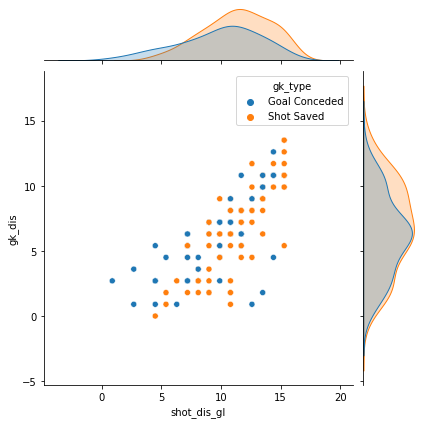

In [42]:
# shot_model.sort_values('shot_dis_gl', ascending=False).head()
sns.jointplot(data=box_shots, x='shot_dis_gl', y='gk_dis', hue='gk_type')

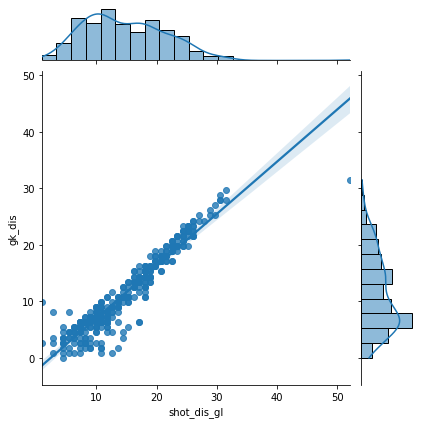

In [32]:
sns.jointplot(data=shot_model, x='shot_dis_gl', y='gk_dis', kind='reg')

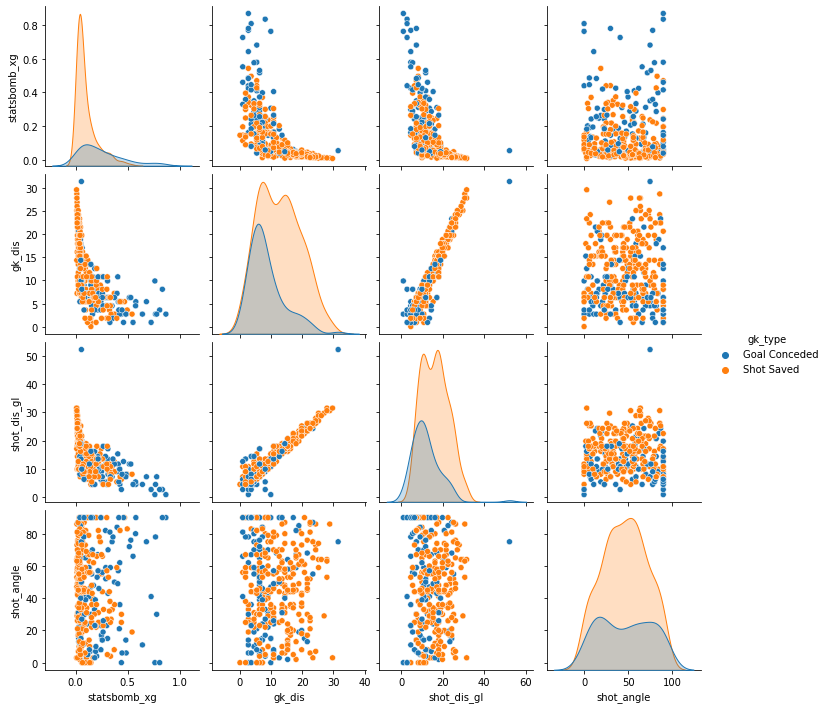

In [34]:
sns.pairplot(data=shot_model, hue='gk_type')

<AxesSubplot:xlabel='gk_dis', ylabel='Count'>

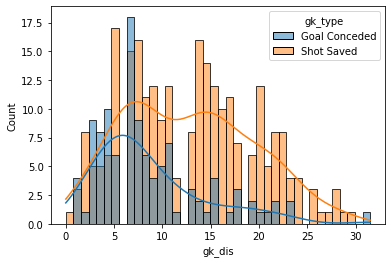

In [17]:
goal = shot_model[shot_model['gk_type'] == 'Goal Conceded']
saves = shot_model[shot_model['gk_type'] == 'Shot Saved']
# sns.histplot(data=shot_model, x='gk_dis', stat='count')
sns.histplot(data=shot_model, x='gk_dis', stat='count', kde=True, hue='gk_type', bins=40)

<AxesSubplot:xlabel='gk_dis', ylabel='Probability'>

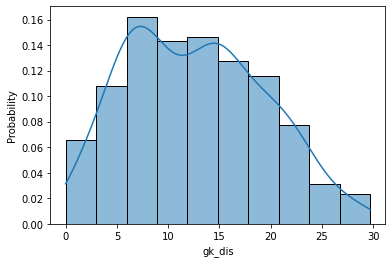

In [18]:
sns.histplot(data=saves, x='gk_dis', stat='probability', kde=True)